In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
   
def load_dataset():
    train_dataset = h5py.File('datasets/train_catvnoncat.h5', "r")# 训练集位置
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # 提取训练集特征数据
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # 提取训练集标签

    test_dataset = h5py.File('datasets/test_catvnoncat.h5', "r") #测试集位置
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # 提取测试集特征数据
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # 提取测试集标签

    classes = np.array(test_dataset["list_classes"][:]) # 类别信息，0表示不是猫，1表示是猫
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0])) #将标签的行向量转换为列向量
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0])) 
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [2]:
# 查看第26张图片是什么样的
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()
index = 25
plt.imshow(train_set_x_orig[index])
print("train_set_y="+str(train_set_y)) #查看标签类型

train_set_y=[[0 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0
  0 1 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 1 0 1 1 0 1 1 1 0 0 0 0 0 0 1 0 0 1 0 0
  0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 1 0 0 0 0 1 0 1 0 1 1 1 1 1
  1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0 1 1 1 1 1 0 0 0 0 1 0 1 1 1 0
  1 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 1 1 1 0 0 1 1 0 1 0 1 0 0 0 0 0
  1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0]]


In [3]:
'''打印出当前训练图片的标签类型，np.squeeze的作用是压缩维度，train_set_y[:,index]的值为[1],压缩后变为1，然后才能进行解码，'''
print("【使用np.squeeze：" + str(np.squeeze(train_set_y[:,index])) + "，不使用np.squeeze： " + str(train_set_y[:,index]) + "】")
print("y=" + str(train_set_y[:,index]) + ", it's a " + classes[np.squeeze(train_set_y[:,index])].decode("utf-8") + "' picture")

【使用np.squeeze：1，不使用np.squeeze： [1]】
y=[1], it's a cat' picture


In [7]:
# train_set_x_orig是一个维度为(m_train, num_px, numpx, 3)的数组
m_train = train_set_y.shape[1] #训练集图片数量
m_test = test_set_y.shape[1] #测试集图片数量
num_px = train_set_x_orig.shape[1] #训练、测试集图片大小都为64x64

#现在看一看我们加载的东西的具体情况
print ("训练集的数量: m_train = " + str(m_train))
print ("测试集的数量 : m_test = " + str(m_test))
print ("每张图片的宽/高 : num_px = " + str(num_px))
print ("每张图片的大小 : (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("训练集_图片的维数 : " + str(train_set_x_orig.shape))
print ("训练集_标签的维数 : " + str(train_set_y.shape))
print ("测试集_图片的维数: " + str(test_set_x_orig.shape))
print ("测试集_标签的维数: " + str(test_set_y.shape))

训练集的数量: m_train = 209
测试集的数量 : m_test = 50
每张图片的宽/高 : num_px = 64
每张图片的大小 : (64, 64, 3)
训练集_图片的维数 : (209, 64, 64, 3)
训练集_标签的维数 : (1, 209)
测试集_图片的维数: (50, 64, 64, 3)
测试集_标签的维数: (1, 50)


In [8]:
'''
这次我们需要将训练集的维度从（209， 64， 64， 3）转换为（64*64*3， 209）的格式，首先使用reshape压缩维度，然后用.T进行转置
'''
# 转置训练集
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
# 转置测试集
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T

In [9]:
print ("训练集降维最后的维度： " + str(train_set_x_flatten.shape))
print ("训练集_标签的维数 : " + str(train_set_y.shape))
print ("测试集降维之后的维度: " + str(test_set_x_flatten.shape))
print ("测试集_标签的维数 : " + str(test_set_y.shape))

训练集降维最后的维度： (12288, 209)
训练集_标签的维数 : (1, 209)
测试集降维之后的维度: (12288, 50)
测试集_标签的维数 : (1, 50)


In [61]:
# 标准化
train_set_x = train_set_x_flatten/255
test_set_x = train_set_x_flatten/255

In [62]:
'''
构建神经网络的主要步骤是：
1.定义模型结构（例如输入特征的数量）
2.初始化模型参数
3.循环
    3.1 计算当前损失（正向传播）
    3.2 计算当前梯度（反向传播）
    3.3 更新参数（梯度下降）
'''
# 定义sigmoid函数
def sigmoid(z):
    '''
    参数：
        z 任何大小的标量或数组
    返回：
        s sigmoid（s）
    '''
    s = 1 / (1 + np.exp(-z))
    return s

In [63]:
# 测试sigmoid
print("==================测试sigmoid函数====================")
print("sigmoid(0)="+str(sigmoid(0)))
print("sigmoid(9.2)="+str(sigmoid(9.2)))

==================测试sigmoid函数====================
sigmoid(0)=0.5
sigmoid(9.2)=0.999898970806


In [66]:
def initialize_with_zeros(dim):    
    """
    此函数为w创建一个维度为（dim， 1）的向量，并将b初始化为0。
    
    参数：
        dim 目标矢量大小
        
    返回：
        w 维度为（dim， 1）的初始化向量
        b 初始化标量（偏差）
    """
    w = np.zeros(shape = (dim, 1))
    b = 0
    # 使用断言进行测试
    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    return (w, b)

In [67]:
def propagate(w, b, X, Y):
    """
    实现前向传播和后向传播的成本函数与梯度运算
    参数：
        w 权值参数
        b 偏置参数，标量
        X 矩阵（num_px*num_px*3, 训练数量）
        Y 标签矢量
    返回：
        cost 逻辑回归的负对数似然成本
        dw 相对于w的损失梯度，和w的形状相同
        db 相对于b的损失梯度，和b的形状相同
    """
    m = X.shape[1] #训练数量
    
    # 正向传播
    A = sigmoid(np.dot(w.T, X) + b) #计算激活值
    cost = (-1 / m) * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A)) #计算损失
    
    # 反向传播
    dw = (1 / m) * np.dot(X, (A - Y).T)
    db = (1 / m) * np.sum(A - Y)
    
    # 断言测试
    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    # 创建一个字典保存dw和db
    grads = {
                "dw": dw,
                "db": db
    }
    return (grads, cost)

In [68]:
# 测试propagate
print("======================测试propagate========================")
# 初始化参数
w, b, X, Y = np.array([[1], [2]]), 2, np.array([[1, 2], [3, 4]]), np.array([[1, 0]])
grads, cost = propagate(w, b, X, Y)
print("dw="+str(grads["dw"]))
print("db="+str(grads["db"]))
print("cost="+str(cost))

======================测试propagate========================
dw=[[ 0.99993216]
 [ 1.99980262]]
db=0.499935230625
cost=6.00006477319


In [75]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    """
    此函数通过梯度下降法来优化w和b
    
    参数：
        w 权重，大小不等的数组（num_px*num_px*3, 1）
        b 偏差，一个标量
        X 维度为（num_px*num_px*3, 1）
        Y 真正的“标签”矢量（如果非猫则为0，如果是猫则为1），矩阵维度为(1,训练数据的数量)
        num_iterations 迭代次数
        learning_rate 学习率
        print_cost 是否输出损失值
        
    返回：
        params 包含权重w和偏置b的字典
        grads 包含权重w和偏差b相对于成本函数的梯度的字典
        costs 优化期间计算所有的成本列表，用于绘制学习曲线
        
    提示：
    我们需要写下两个步骤并遍历它们：
        1）计算当前参数的成本和梯度，使用propagate（）。
        2）使用w和b的梯度下降法则更新参数。
    """
    
    costs = []
    
    for i in range(num_iterations):
        
        grads, cost = propagate(w, b, X, Y)
        
        dw = grads["dw"]
        db = grads["db"]
        
        w = w - learning_rate*dw
        b = b - learning_rate*db 
        
        # 记录成本
        if i % 100 == 0:
            costs.append(cost)
        # 打印成本数据
        if (print_cost) and (i%100 == 0):
            print("迭代的次数：%i ， 误差值为：%f"%(i, cost))
    params = {
                 "w": w,
                 "b": b
        }
    grads = {
                "dw": dw,
                "db": db
        }
    
    return (params, grads, costs)

In [76]:
# 测试optimize
print("==================测试optimize====================")
w, b, X, Y = np.array([[1], [2]]), 2, np.array([[1, 2], [3, 4]]), np.array([[1, 0]])
params, grads, costs = optimize(w, b, X, Y, num_iterations=100, learning_rate=0.009, print_cost=False)
print("w="+str(params["w"]))
print("b="+str(params["b"]))
print("dw="+str(grads["dw"]))
print("db="+str(grads["db"]))

==================测试optimize====================
w=[[ 0.1124579 ]
 [ 0.23106775]]
b=1.55930492484
dw=[[ 0.90158428]
 [ 1.76250842]]
db=0.430462071679


In [77]:
def predict(w, b, X):
    """
    使用逻辑回归参数logistic(w, b)预测标签是0还是1
    
    参数：
        w 权重，大小不等的数组（num_px*num_px*3, 1）
        b 偏差，一个标量
        X 维度为(num_px*num_px*3, 训练数据数量)的数据
        
    返回：
        Y_predict 包含X中所有图片预测的一个numpy数组（向量）
    """
    m = X.shape[1]
    Y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)
    
    # 计算猫在图片中出现的概率
    A = sigmoid(np.dot(w.T, X) + b)
    for i in range(A.shape[1]):
        # 将概率a[0, i]转换为实际预测p[0, i]
        Y_prediction[0, i] = 1 if A[0, i] > 0.5 else 0
    
    # 使用断言
    assert(Y_prediction.shape == (1, m))
    
    return Y_prediction

In [78]:
# 测试predict
print("====================测试predict====================")
w, b, X, Y = np.array([[1], [2]]), 2, np.array([[1,2], [3,4]]), np.array([[1, 0]])
print("predictions = " + str(predict(w, b, X)))

====================测试predict====================
predictions = [[ 1.  1.]]


In [79]:
# 将所有部分整合到一个model中，包括初始化参数initialize_with_zeros(),优化函数optimize,预测函数predict
def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.05, print_cost = False):
    """
    参数说明：
        X_train 训练集 维度为（num_px*num_px*3, m_train）的numpy数组
        Y_train 训练集标签 维度为（1, m_train）的numpy数组
        X_test 测试集 维度为(num_px*num_px*3, m_test)的numpy数组
        Y_test 测试集标签 维度为（1, m_test）的numpy数组
        num_iterations 迭代次数
        learning_rate 学习率
        print_cost 是否输出损失值
    """
    w, b = initialize_with_zeros(X_train.shape[0])
    
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    # 取出参数w和b
    w, b = parameters["w"], parameters["b"]
    
    # 预测测试
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)
    
    # 打印测试结果
    print("训练集准确性：", format(100 - np.mean(np.abs(Y_prediction_train - Y_train))*100), "%") # np.abs() 计算绝对值
    print("测试集准确性：", format(100 - np.mean(np.abs(Y_prediction_test - Y_test))*100), "%")
    
    d = {
            "costs" : costs,
            "Y_prediction_test" : Y_prediction_test,
            "Y_prediciton_train" : Y_prediction_train,
            "w" : w,
            "b" : b,
            "learning_rate" : learning_rate,
            "num_iterations" : num_iterations }
    return d

In [87]:
print("====================测试model====================")     
# 这里加载的是真实的数据，请参见上面的代码部分。
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 2000, learning_rate = 0.01, print_cost = True)

====================测试model====================
迭代的次数：0 ， 误差值为：0.693147
迭代的次数：100 ， 误差值为：0.823921
迭代的次数：200 ， 误差值为：0.418944
迭代的次数：300 ， 误差值为：0.617350
迭代的次数：400 ， 误差值为：0.522116
迭代的次数：500 ， 误差值为：0.387709
迭代的次数：600 ， 误差值为：0.236254
迭代的次数：700 ， 误差值为：0.154222
迭代的次数：800 ， 误差值为：0.135328
迭代的次数：900 ， 误差值为：0.124971
迭代的次数：1000 ， 误差值为：0.116478
迭代的次数：1100 ， 误差值为：0.109193
迭代的次数：1200 ， 误差值为：0.102804
迭代的次数：1300 ， 误差值为：0.097130
迭代的次数：1400 ， 误差值为：0.092043
迭代的次数：1500 ， 误差值为：0.087453
迭代的次数：1600 ， 误差值为：0.083286
迭代的次数：1700 ， 误差值为：0.079487
迭代的次数：1800 ， 误差值为：0.076007
迭代的次数：1900 ， 误差值为：0.072809
训练集准确性： 99.52153110047847 %
测试集准确性： 53.734384681030505 %


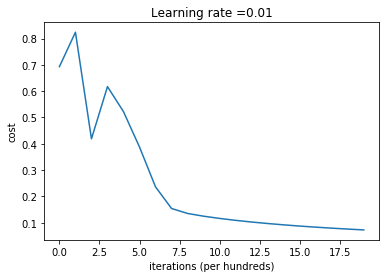

In [88]:
# 绘制图
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()